In [1]:
import numpy
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Normalization, Dense, Dropout, Conv2D, Flatten, MaxPooling2D, Input, Lambda
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import math
from tensorflow.keras import datasets, utils
from sklearn.model_selection import train_test_split
import cv2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import os
import emnist 
for dirname, _, filenames in os.walk('Datasets/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Datasets/emnist-balanced-mapping.txt
Datasets/emnist-balanced-test.csv
Datasets/emnist-balanced-train.csv
Datasets/emnist-byclass-mapping.txt
Datasets/emnist-byclass-test.csv
Datasets/emnist-byclass-train.csv
Datasets/emnist-bymerge-mapping.txt
Datasets/emnist-bymerge-test.csv
Datasets/emnist-bymerge-train.csv
Datasets/emnist-digits-mapping.txt
Datasets/emnist-digits-test.csv
Datasets/emnist-digits-train.csv
Datasets/emnist-letters-mapping.txt
Datasets/emnist-letters-test.csv
Datasets/emnist-letters-train.csv
Datasets/emnist-mnist-mapping.txt
Datasets/emnist-mnist-test.csv
Datasets/emnist-mnist-train.csv
Datasets/emnist-normal-bymerge.npy
Datasets/emnist-reshaped-bymerge.csv
Datasets/emnist_source_files\emnist-balanced-test-images-idx3-ubyte
Datasets/emnist_source_files\emnist-balanced-test-labels-idx1-ubyte
Datasets/emnist_source_files\emnist-balanced-train-images-idx3-ubyte
Datasets/emnist_source_files\emnist-balanced-train-labels-idx1-ubyte
Datasets/emnist_source_files\emnist-byclas

In [2]:
df = pd.read_csv('Datasets/emnist-bymerge-train.csv', header=None)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,697932.000000,697932.0,697932.0,697932.0,697932.000000,697932.000000,697932.000000,697932.000000,697932.000000,697932.000000,...,697932.000000,697932.000000,697932.000000,697932.000000,697932.000000,697932.0,697932.0,697932.0,697932.0,697932.0
mean,16.819945,0.0,0.0,0.0,0.000009,0.000853,0.004304,0.007174,0.007410,0.007342,...,0.000050,0.000047,0.000047,0.000387,0.000046,0.0,0.0,0.0,0.0,0.0
std,14.384663,0.0,0.0,0.0,0.006104,0.250395,0.742947,1.011393,1.007655,1.039561,...,0.041895,0.039501,0.039501,0.293721,0.038304,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,4.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,10.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,28.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,46.000000,0.0,0.0,0.0,5.000000,107.000000,215.000000,217.000000,247.000000,216.000000,...,35.000000,33.000000,33.000000,244.000000,32.000000,0.0,0.0,0.0,0.0,0.0


In [4]:
df.shape

(697932, 785)

In [3]:
labels = pd.read_csv('Datasets/emnist-bymerge-mapping.txt',
                     delimiter=' ', header=None, index_col=0)
labels

,1
0,
0,48
1,49
2,50
3,51
4,52
5,53
6,54
7,55
8,56


In [4]:
labels = labels.squeeze()
labels

0
0      48
1      49
2      50
3      51
4      52
5      53
6      54
7      55
8      56
9      57
10     65
11     66
12     67
13     68
14     69
15     70
16     71
17     72
18     73
19     74
20     75
21     76
22     77
23     78
24     79
25     80
26     81
27     82
28     83
29     84
30     85
31     86
32     87
33     88
34     89
35     90
36     97
37     98
38    100
39    101
40    102
41    103
42    104
43    110
44    113
45    114
46    116
Name: 1, dtype: int64

In [5]:
label_dict = {}

for index, label in enumerate(labels):
    label_dict[index] = chr(label)
    
label_dict

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

In [6]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]
X

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697927,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697928,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697929,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
y

0         24
1         36
2          5
3          6
4         35
          ..
697927    45
697928    25
697929     9
697930    36
697931     1
Name: 0, Length: 697932, dtype: int64

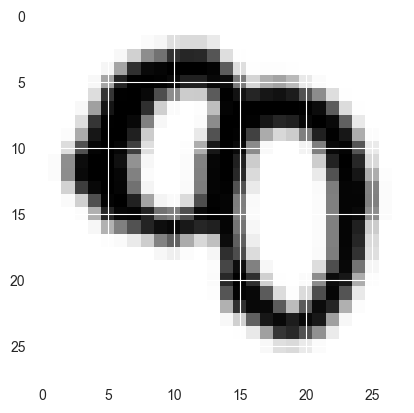

In [10]:
IMG_SIZE = 28
plt.imshow(X.iloc[1000].values.reshape(IMG_SIZE, IMG_SIZE), cmap=plt.cm.binary)

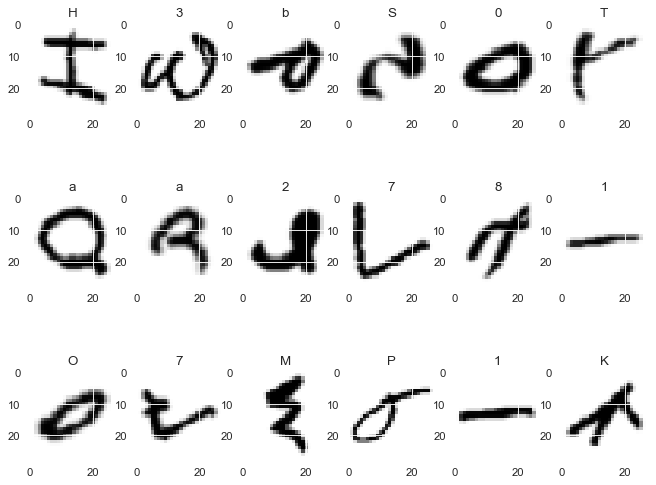

In [11]:
#Unclean Data
plt.figure(figsize=(10, 8), dpi=80)
for i in range(100, 118):
    plt.subplot(3,6,i-99)
    plt.imshow(X.iloc[i].values.reshape(IMG_SIZE, IMG_SIZE), cmap=plt.cm.binary)
    plt.title(label_dict[y[i]])


In [9]:
def fandr(character):
    W = 28
    H = 28
    
    character = character.reshape(W,H)
    character = np.fliplr(character)
    character = np.rot90(character)
    
    return character

In [10]:
X_Data = np.apply_along_axis(fandr, 1, X.values)
X_Data

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

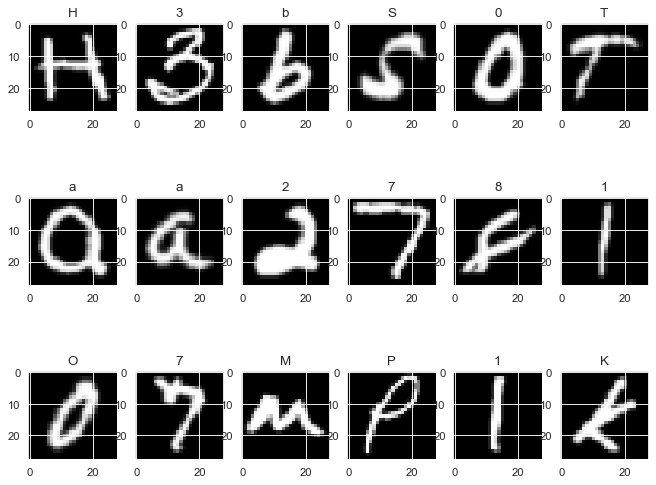

In [14]:
plt.figure(figsize=(10, 8), dpi=80)
for i in range(100, 118):
    plt.subplot(3,6,i-99)
    plt.imshow(X_Data[i], cmap=plt.cm.gray)
    plt.title(label_dict[y[i]])

In [15]:
X_Data.shape

(697932, 28, 28)

In [11]:
local_X_Data = X_Data.reshape(697932, 28*28)
local_X_Data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
# frame = pd.DataFrame(local_X_Data).to_csv('Datasets/emnist-reshaped-bymerge.csv')

In [18]:
# scaler = StandardScaler()
# scaler.fit(local_X_Data)

In [2]:
mean_net = np.loadtxt('mean.txt', dtype=float)
mean_net = mean_net.reshape(1,28*28)
mean_net

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.86560868e-05,
        3.59633890e-04, 3.39574629e-04, 2.57904782e-04, 6.54791584e-04,
        7.80878366e-04, 8.51085779e-04, 9.38486844e-04, 1.66921706e-03,
        1.53310065e-03, 8.00937627e-04, 2.34979912e-04, 2.90859281e-04,
        3.20948173e-04, 1.81966151e-04, 1.43280434e-06, 0.00000000e+00,
        0.00000000e+00, 4.01185216e-05, 2.20651869e-03, 9.48086633e-03,
        2.06280841e-02, 3.54705043e-02, 5.77778351e-02, 8.51945462e-02,
        1.16173209e-01, 1.59174533e-01, 2.11209688e-01, 2.76313452e-01,
        3.69836890e-01, 4.77076563e-01, 5.98929409e-01, 6.91790891e-01,
        7.33241920e-01, 7.29913516e-01, 6.85960810e-01, 6.11338927e-01,
        5.13209023e-01, 4.05688520e-01, 2.89574056e-01, 1.85220050e-01,
        9.63016454e-02, 2.92865207e-02, 1.34110486e-03, 0.000000

In [38]:
local_X_Data.shape

(697932, 784)

In [3]:
std_net = np.loadtxt('standy.txt', dtype=float)
std_net = std_net.reshape(1,28*28)
std_net

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 2.39399439e-02,
        2.92187470e-01, 2.19272661e-01, 1.81557237e-01, 2.48522570e-01,
        3.38614172e-01, 3.70384341e-01, 4.32817656e-01, 5.28668193e-01,
        5.37491260e-01, 3.94487689e-01, 1.42286577e-01, 1.72105432e-01,
        2.59883489e-01, 1.52018644e-01, 1.19699720e-03, 1.00000000e+00,
        1.00000000e+00, 1.12287654e-02, 1.97843907e-01, 4.30064369e-01,
        6.88112546e-01, 8.91192096e-01, 1.15958355e+00, 1.41488731e+00,
        1.63407183e+00, 1.90738544e+00, 2.19020801e+00, 2.40030003e+00,
        2.80917626e+00, 3.25067390e+00, 3.76931405e+00, 4.14008430e+00,
        4.26826651e+00, 4.38352686e+00, 4.25629879e+00, 4.01589854e+00,
        3.60870858e+00, 3.14402132e+00, 2.70085873e+00, 2.19481513e+00,
        1.57904206e+00, 1.01834456e+00, 1.73670949e-01, 1.000000

In [4]:
normaliser = lambda x : ((x - mean_net) / std_net).reshape(28, 28, 1)

In [5]:
local_X_Data = pd.read_csv('Datasets/emnist-reshaped-bymerge.csv')
local_X_Data = np.array([normaliser(x) for x in (np.array(local_X_Data.iloc[:, 1:]))])
local_X_Data

array([[[[ 0.        ],
         [ 0.        ],
         [ 0.        ],
         ...,
         [-0.001197  ],
         [-0.001197  ],
         [ 0.        ]],

        [[ 0.        ],
         [-0.00357283],
         [-0.01115283],
         ...,
         [-0.02875895],
         [-0.0077221 ],
         [ 0.        ]],

        [[ 0.        ],
         [-0.01025378],
         [-0.03018486],
         ...,
         [-0.08606118],
         [-0.03004914],
         [-0.00165994]],

        ...,

        [[-0.001197  ],
         [-0.02374899],
         [-0.07051541],
         ...,
         [-0.03973727],
         [-0.01376886],
         [ 0.        ]],

        [[-0.001197  ],
         [-0.00740362],
         [-0.02410608],
         ...,
         [-0.01434075],
         [-0.00729305],
         [ 0.        ]],

        [[ 0.        ],
         [-0.001197  ],
         [-0.001197  ],
         ...,
         [ 0.        ],
         [ 0.        ],
         [ 0.        ]]],


       [[[ 0.        ],


In [22]:
np.save('Datasets/emnist-normal-bymerge.npy', local_X_Data)

In [6]:
local_X_Data.shape

(697932, 28, 28, 1)

In [30]:
# norm_layer = Lambda(
#     lambda x : ((x - mean_net) / std_net).reshape(-1, 28, 28, 1)
# )

In [16]:
model = Sequential()
# model.add(Input(shape=(28*28,)))
# model.add(norm_layer)
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(47, activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
optimizer_Adam = Adam(learning_rate=0.0001)
scc_loss = SparseCategoricalCrossentropy()

In [18]:
model.compile(loss=scc_loss, optimizer=optimizer_Adam, metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
mcp_save = ModelCheckpoint('char_model.keras', save_best_only=True, monitor='val_loss', verbose=1, mode='auto')

In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
type(y)

NameError: name 'y' is not defined

In [2]:
y = np.array(pd.read_csv('Datasets/emnist-bymerge-train.csv', header=None).iloc[:, 0])
y

array([24, 36,  5, ...,  9, 36,  1], dtype=int64)

In [36]:
type(local_X_Data)

numpy.ndarray

In [3]:
np.save('Datasets/emnist-target-bymerge.npy', y)

In [20]:
history = model.fit(local_X_Data,
                    y, 
                    epochs=5, 
                    batch_size=32, 
                    verbose=1, 
                    validation_split=0.1,
                    callbacks=[early_stopping, mcp_save])

KeyboardInterrupt: 

numpy.ndarray

numpy.ndarray